# Capstone Project - Starbucks Site selection in Toronto
### IBM Data Science Professional Certificate by Coursera

## Contents

1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Analysis](#analysis)

## 1. Introduction: Business Problem <a name="introduction"></a>

Given the recent announcement in early 2021 of Starbucks closing down up to 300 coffee shops across Canada in response to a change in customer behaviour and preferences, the company is closing stores in downtown core areas and will be focusing on expanding to more pick-up and convenience-led store formats. The stakeholders of Starbucks corp. are looking for optimal sites to open their next stores to reduce cost and obtain high benefits.

Toronto is the capital city of the Canadian province of Ontario and the most populous city in Canada. Unlike most of the grid-plan suburbs found in the outskirts of most North American cities, many suburban neighborhoods in Toronto encouraged high-density populations by mixing single-detached housing with higher-density apartment blocks. This kind of diverse cityscape provides ample opportunites to open the new-format Starbucks.

Socioeconomic factors such as population, regional income level, consumer demographics (age) and competitors are important influencers in a good site selection strategy. The objective of this study is to generate a few most promising neighborhoods in Toronto based on these factors. This study is targeted to the global market planning department of Starbucks and Starbucks' local representatives of Toronto. We will use various Data Science techniques including Clustering to explore the neighborhoods, cluster them based on the above factors, compare to the existing Starbucks locations, and select the optimal neighborhood cluster(s) to open the new-format Starbucks. 

## 2. Data <a name="data"></a>

### 2.1. Data Sources

Based on our business problem, the factors that will influence our decision are:
   * population
   * income
   * age groups
   * number of competitors (coffee shops)

Following data sources will be needed to extract/generate the required information:

a) https://open.toronto.ca/dataset/neighbourhood-profiles/: The population demographics information (population and income of each neighborhoods) will be obtained from this link of **Open Data Portal - City of Toronto**.

b) https://open.toronto.ca/dataset/wellbeing-toronto-demographics/ : Population grouped by age groups in each neighborhood will be generated from this link of **Open Data Portal - City of Toronto**.

c) https://opencagedata.com : The **OpenCage Geocoding API** will provide the geographical coordinates of the neighborhoods.

d) https://developer.foursquare.com/ : Number of coffee shops, their locations and that of Starbucks will be extracted using the explore function of the **Foursquare API**. 


### 2.2. Data Cleaning

### Creating Neighborhoods profile dataframe

#### Load population demographics data

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

In [2]:
%cd "E:\Studies\Coursera\IBM Data Science Prof. Cert\Lab\Course 10 Applied Data Science Capstone project\Capstone Project"

E:\Studies\Coursera\IBM Data Science Prof. Cert\Lab\Course 10 Applied Data Science Capstone project\Capstone Project


In [3]:
#load the neighborhood profile dataset and create a dataframe
df_pop = pd.read_csv('neighbourhood_profiles.csv')
df_pop.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [4]:
#drop columns that is not needed
df_pop.drop(df_pop.columns[[0,1,2,3]], axis=1, inplace=True)
df_pop.set_index('Characteristic', inplace=True)

#slice to get a dataframe. we are interested in population and after-tax income
df_pop_sliced = df_pop.loc[["Population, 2016",
    "Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data"]]
df_pop_sliced.drop(['City of Toronto'], axis=1, inplace=True)

#transpose the dataframe and rename the columns
df_neigh = df_pop_sliced.T
df_neigh.columns = ['Population', 'Income']
df_neigh.index.name = 'Neighborhood'

print(df_neigh.shape)
df_neigh.head()

(140, 2)


,Population,Income
Neighborhood,,
Agincourt North,"29,113","24,995"
Agincourt South-Malvern West,"23,757","20,395"
Alderwood,"12,054","10,265"
Annex,"30,526","26,305"
Banbury-Don Mills,"27,695","23,390"


#### Load age group data

In [5]:
#load age group data
df_age = pd.read_excel('age_population.xlsx')

# drop Neighbourhood ID and rename the Neighbourhood column
df_age.drop(['NeighbourhoodID'], axis=1, inplace=True)
df_age.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
df_age.set_index(['Neighborhood'])

print(df_age.shape)
df_age.head()

(141, 26)


,Neighborhood,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,West Humber-Clairville,1540.0,5060.0,1720.0,1790.0,5.0,2325.0,3120.0,2785.0,2345.0,...,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,Mount Olive-Silverstone-Jamestown,2190.0,7090.0,2500.0,2415.0,0.0,2585.0,2655.0,2400.0,2250.0,...,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,Thistletown-Beaumond Heights,540.0,1730.0,600.0,595.0,5.0,650.0,760.0,680.0,715.0,...,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,Rexdale-Kipling,560.0,1640.0,515.0,565.0,0.0,635.0,720.0,715.0,680.0,...,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,Elms-Old Rexdale,540.0,1805.0,605.0,660.0,0.0,690.0,750.0,600.0,575.0,...,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


#### Merge the two dataframes

In [6]:
df_census = pd.merge(df_neigh, df_age, on = 'Neighborhood', how = 'inner')

# drop some columns
df_census.drop(['Total Population - All Age Groups - 100% data', '0 to 04 years','05 to 09 years', 
                '100 years and over', '55 years and over', '65 years and over', 
                '85 years and over', '95 to 99 years'], axis=1, inplace=True)

#add a new column "State" contaning the value Ontario to dataframe 
df_census["State"] = 'Ontario'

# change population and income to float

df_census['Population'] = df_census['Population'].str.replace(',', '').astype(float)
df_census['Income'] = df_census['Income'].str.replace(',', '').astype(float)

print(df_census.shape)
df_census.head()

(139, 21)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State
0,Agincourt North,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,...,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,Ontario
1,Agincourt South-Malvern West,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,...,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,Ontario
2,Alderwood,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,...,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario
3,Annex,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,...,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,Ontario
4,Banbury-Don Mills,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,...,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,Ontario


In [6]:
### DO NOT RUN!!!

df_census = pd.merge(df_neigh, df_age, on = 'Neighborhood', how = 'inner')

# 45 to 49 years age group is missing. Calculate from the data and add to the dataframe
df_census['sum'] = df_census['10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                              '30 to 34 years', '35 to 39 years', '40 to 44 years', '55 years and over'].sum(axis=1)

df_census['45 to 49 years'] = df_census['Total Population - All Age Groups - 100% data'] - df_census['sum']

# drop some columns
df_census.drop(['sum', 'Total Population - All Age Groups - 100% data', '0 to 04 years','05 to 09 years', 
                '100 years and over', '55 years and over', '65 years and over', 
                '85 years and over', '95 to 99 years'], axis=1, inplace=True)

#add a new column "State" contaning the value Ontario to dataframe 
df_census["State"] = 'Ontario'

# change population and income to float

df_census['Population'] = df_census['Population'].str.replace(',', '').astype(float)
df_census['Income'] = df_census['Income'].str.replace(',', '').astype(float)

print(df_census.shape)
df_census.head()

KeyError: ('10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '55 years and over')

#### Get geographical coordinates using OpenCage API

In [7]:
#install and import OpenCageGeocode module
!pip install opencage

from opencage.geocoder import OpenCageGeocode

print("Libraries loaded!")

Libraries loaded!


As the simplest, not-most-efficient approach, I am going to iterate over each row to get the city and state, then use the API to get the corresponding coordinates. I’ll save longitudes and latitudes in two separate lists. Then I can add these two lists as new columns once I’m done.

In [8]:
key = 'b87f2c9f6e4c426caf738d3b6c23a9c4' #API key from https://opencagedata.com

geocoder = OpenCageGeocode(key)

list_lat = [] # create empty lists
list_long = []

for index, row in df_census.iterrows(): #iterate over rows in dataframe
    
    Neighborhood = row['Neighborhood']
    State = row['State']
    query = str(Neighborhood)+','+str(State)
    
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
    list_lat.append(lat)
    list_long.append(long)

# Create new columns from lists
df_census['Latitude'] = list_lat
df_census['Longitude'] = list_long

In [9]:
print(df_census.shape)
df_census.head() #check the last columns!

(139, 23)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State,Latitude,Longitude
0,Agincourt North,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,...,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,Ontario,43.808038,-79.266439
1,Agincourt South-Malvern West,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,...,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,Ontario,43.788555,-79.265661
2,Alderwood,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,...,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario,43.601717,-79.545232
3,Annex,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,...,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,Ontario,43.670338,-79.407117
4,Banbury-Don Mills,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,...,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,Ontario,43.752339,-79.365716


In [60]:
# We will create a function diagnostic_plots() which plots the histogram, Q-Q plot, and box plot 
# for the specified variable of the given data frame.

# for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

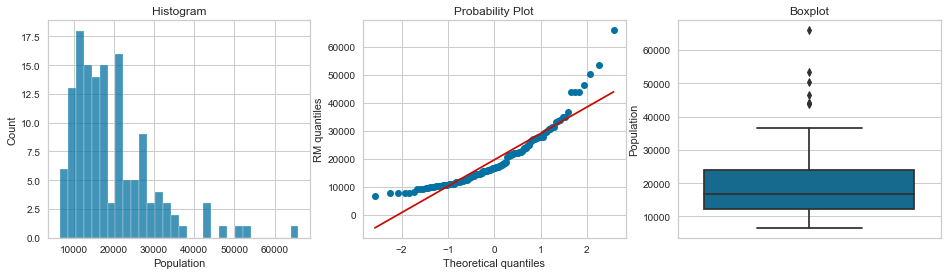

In [61]:
diagnostic_plots(df_census, 'Population')

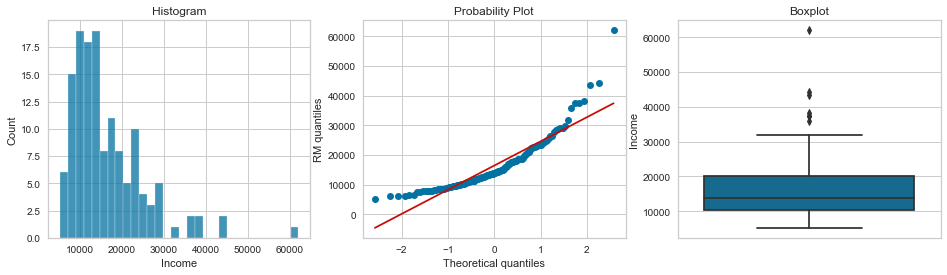

In [62]:
diagnostic_plots(df_census, 'Income')

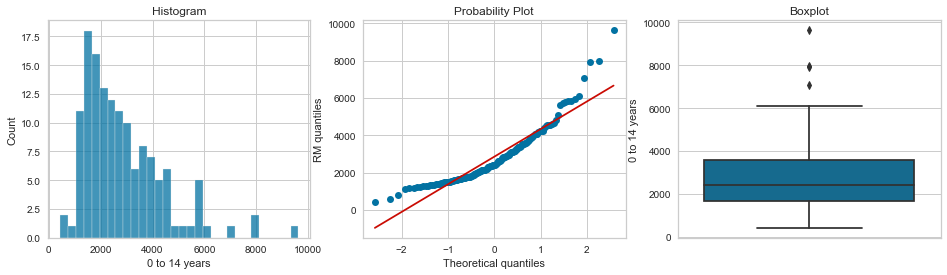

In [63]:
diagnostic_plots(df_census, '0 to 14 years')

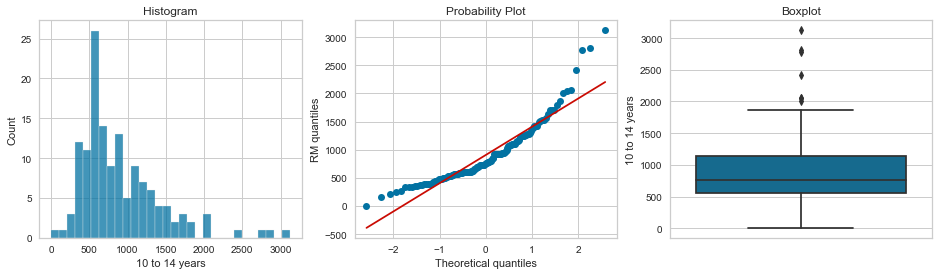

In [64]:
diagnostic_plots(df_census, '10 to 14 years')

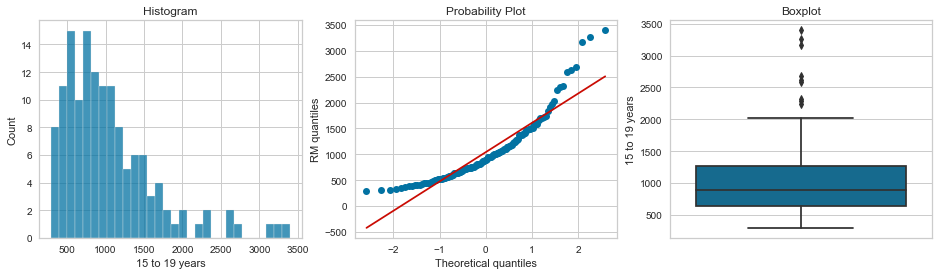

In [65]:
diagnostic_plots(df_census, '15 to 19 years')

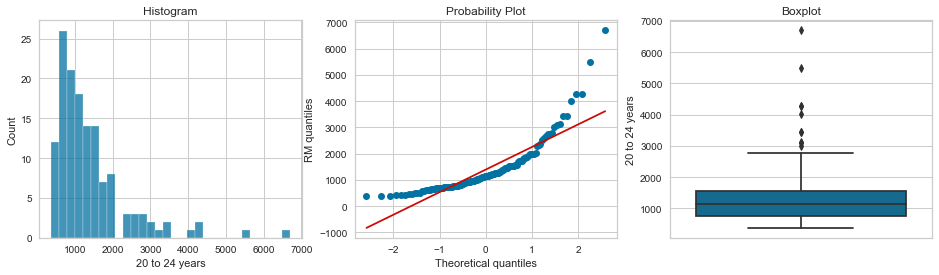

In [66]:
diagnostic_plots(df_census, '20 to 24 years')

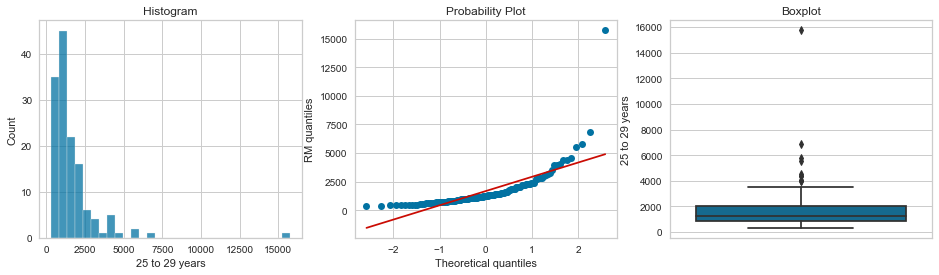

In [67]:
diagnostic_plots(df_census, '25 to 29 years')

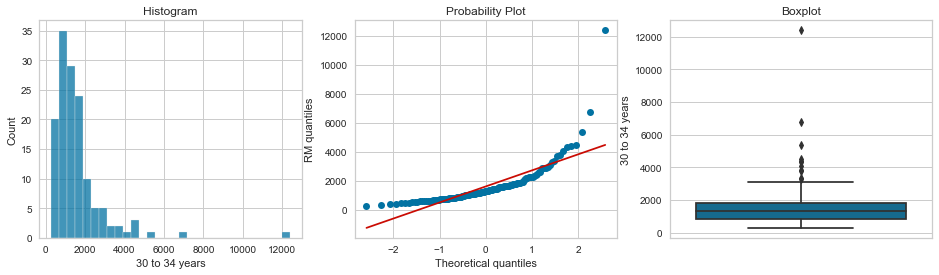

In [68]:
diagnostic_plots(df_census, '30 to 34 years')

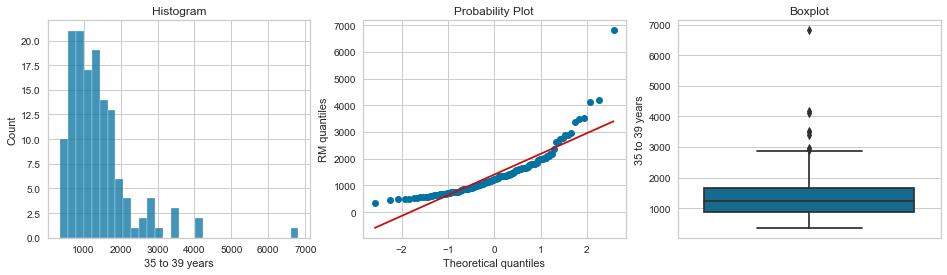

In [69]:
diagnostic_plots(df_census, '35 to 39 years')

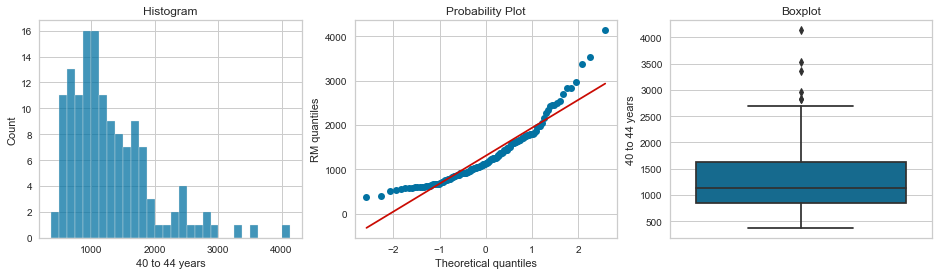

In [70]:
diagnostic_plots(df_census, '40 to 44 years')

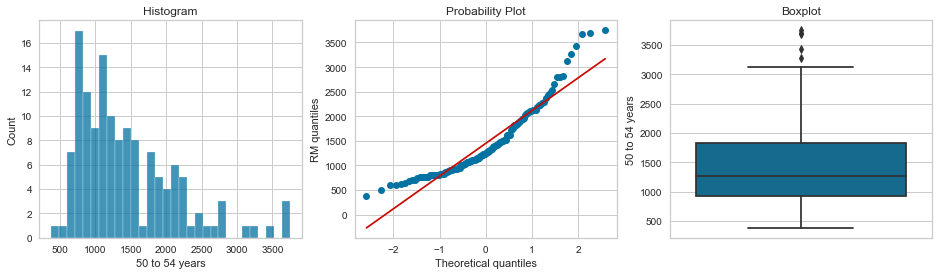

In [71]:
diagnostic_plots(df_census, '50 to 54 years')

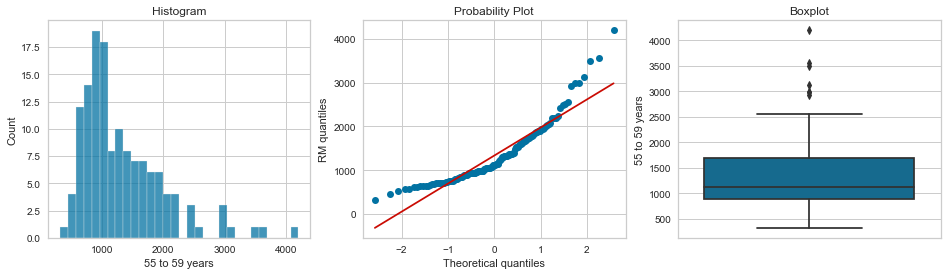

In [72]:
diagnostic_plots(df_census, '55 to 59 years')

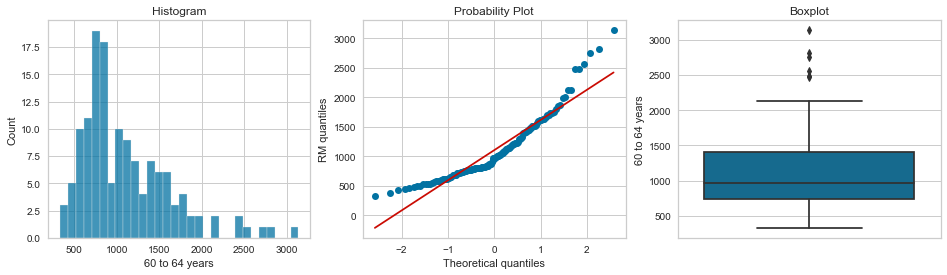

In [73]:
diagnostic_plots(df_census, '60 to 64 years')

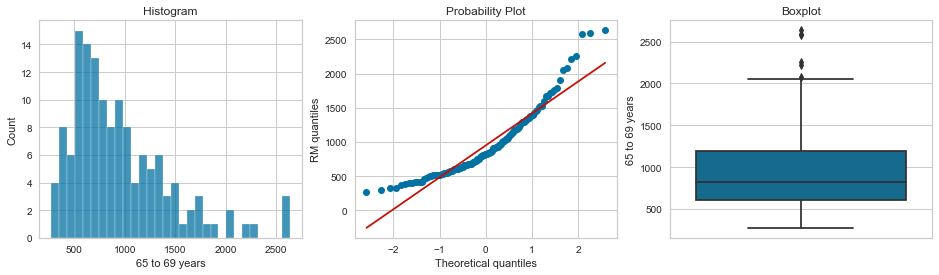

In [74]:
diagnostic_plots(df_census, '65 to 69 years')

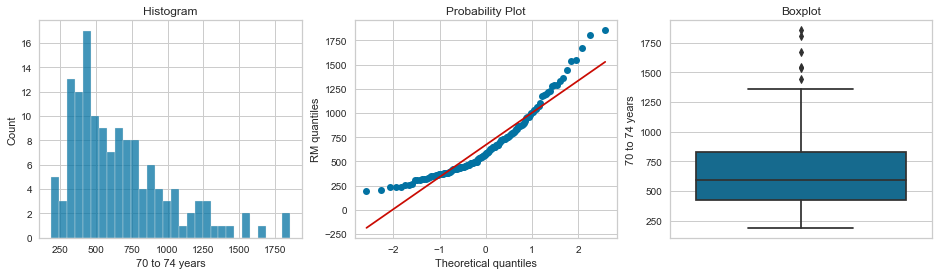

In [75]:
diagnostic_plots(df_census, '70 to 74 years')

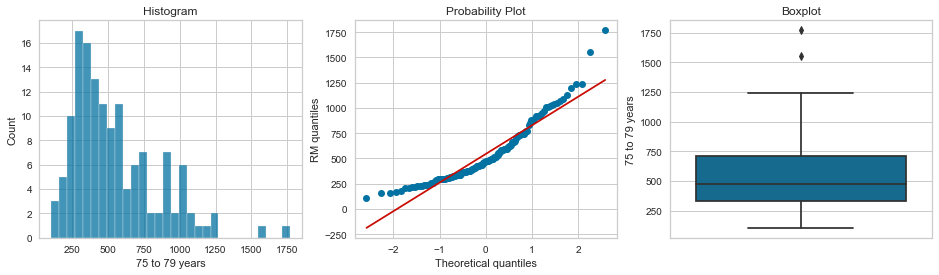

In [76]:
diagnostic_plots(df_census, '75 to 79 years')

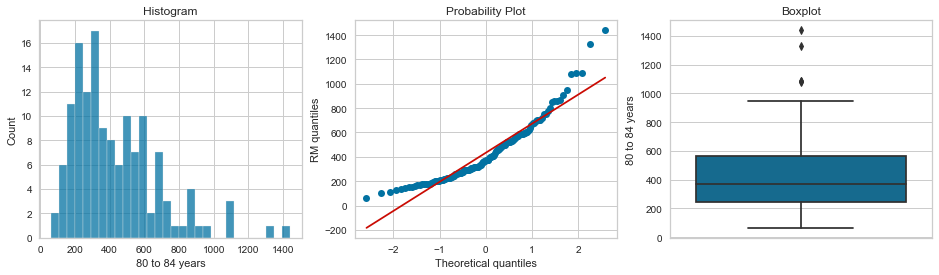

In [77]:
diagnostic_plots(df_census, '80 to 84 years')

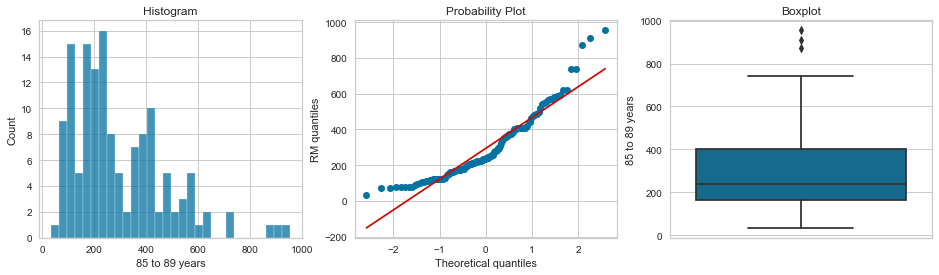

In [78]:
diagnostic_plots(df_census, '85 to 89 years')

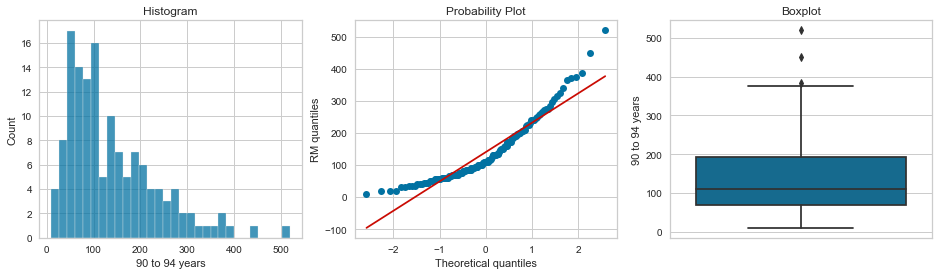

In [79]:
diagnostic_plots(df_census, '90 to 94 years')

Now we have our Neighborhoods Profile Dataframe. The dataframe contains the list of neighborhoods in Toronto along with their population, income, population per age group, and geo coordinates. 

Let's visualize the data.

In [10]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.



In [11]:
#Use OpenCageGeocode library to get the latitude and longitude values of Toronto

query_toronto = 'Toronto, Ontario'

location_toronto = geocoder.geocode(query_toronto)

latitude_toronto = location_toronto[0]['geometry']['lat']
longitude_toronto = location_toronto[0]['geometry']['lng']

print('The geographical coordinates of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geographical coordinates of Toronto are 43.6534817, -79.3839347.


In [12]:
#Create a map of Toronto with neighborhoods superimposed on top
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

#add markers to map
for lat, lng, neighborhood in zip(df_census['Latitude'], df_census['Longitude'], 
                                         df_census['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### Foursquare API - extracting venues

Let's explore each neighborhood using Foursquare API to get info on Starbucks and coffee shops. Coffee shops are the direct competitors so they are included.

In [13]:
#Define Foursquare credentials and Version
CLIENT_ID = 'CAFGEUTLP40HWRS2HYMCJC5XSAEHY4N04UB3PQL2WXP4UC2I' #your Foursquare ID
CLIENT_SECRET = 'HYFQMVIQZMJ0HH35PGQY3VMYRO3DQ2LKZAWCWPV42HJHI1RM' #your Foursquare Secret
VERSION = '20190425' #Foursquare API version
LIMIT = 100 #A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET' + CLIENT_SECRET)

Your credentials:
CLIENT_ID:CAFGEUTLP40HWRS2HYMCJC5XSAEHY4N04UB3PQL2WXP4UC2I
CLIENT_SECRETHYFQMVIQZMJ0HH35PGQY3VMYRO3DQ2LKZAWCWPV42HJHI1RM


In [14]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Create a function to get nearby venues to the neighborhoods in Toronto
def getNearbyVenues(neighborhood, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for neighborhood, lat, lng in zip(neighborhood, latitudes, longitudes):
            
        #create the API request URL
        url_foursquare = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_foursquare = requests.get(url_foursquare).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            neighborhood,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_foursquare])

    #convert the list into a new dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood_Latitude', 
                             'Neighborhood_Longitude', 
                             'Venue', 
                             'Venue_Latitude', 
                             'Venue_Longitude', 
                             'Venue_Category']
    
    return(nearby_venues)

In [15]:
#Now apply the above function on each neighborhood and create a new dataframe
df_nearbyvenues = getNearbyVenues(neighborhood=df_census['Neighborhood'],
                                   latitudes=df_census['Latitude'],
                                   longitudes=df_census['Longitude']
                                  )

print(df_nearbyvenues.shape)
df_nearbyvenues.head()

(2606, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Agincourt North,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
1,Agincourt North,43.808038,-79.266439,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
2,Agincourt North,43.808038,-79.266439,Booster Juice,43.809915,-79.269382,Juice Bar
3,Agincourt North,43.808038,-79.266439,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
4,Agincourt North,43.808038,-79.266439,Dollarama,43.808894,-79.269854,Discount Store


#### Starbucks Data

Filter to get neighborhoods with atleast one Coffee Shop

In [16]:
df_coffee_shops = df_nearbyvenues.query('Venue_Category == "Coffee Shop"')

print(df_coffee_shops.shape)
df_coffee_shops.head()

(168, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
11,Agincourt North,43.808038,-79.266439,Tim Hortons,43.809993,-79.269032,Coffee Shop
51,Alderwood,43.601717,-79.545232,Tim Hortons,43.602396,-79.545048,Coffee Shop
87,Annex,43.670338,-79.407117,Tim Hortons,43.666719,-79.404263,Coffee Shop
88,Annex,43.670338,-79.407117,Second Cup (Miles Nadal JCC Fitness),43.666527,-79.403872,Coffee Shop
105,Bathurst Manor,43.665519,-79.411937,Volta Coffee,43.667314,-79.412145,Coffee Shop


Filter to get neighborhoods with atleast one Starbucks.

In [17]:
df_starbucks = df_nearbyvenues.query('Venue == "Starbucks"')

print(df_starbucks.shape)
df_starbucks.head()

(40, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
215,Bedford Park-Nortown,43.731516,-79.420191,Starbucks,43.728673,-79.418513,Coffee Shop
219,Bedford Park-Nortown,43.731516,-79.420191,Starbucks,43.732604,-79.419136,Coffee Shop
263,Blake-Jones,43.676170,-79.337378,Starbucks,43.679850,-79.340370,Coffee Shop
374,Church-Yonge Corridor,43.670786,-79.385687,Starbucks,43.670340,-79.388262,Coffee Shop
407,Church-Yonge Corridor,43.670786,-79.385687,Starbucks,43.671082,-79.380756,Coffee Shop


Merge the starbucks dataframe with the census dataframe to get the final dataframe consisting of details of the neighborhoods having Starbucks.

In [18]:
df_starbucks_final = pd.merge(df_census, df_starbucks, on = 'Neighborhood', how = 'inner')

print(df_starbucks_final.shape)
df_starbucks_final.head()

(40, 29)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,90 to 94 years,State,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Bedford Park-Nortown,23236.0,18560.0,4555.0,1705.0,1725.0,1485.0,875.0,1095.0,1370.0,...,200.0,Ontario,43.731516,-79.420191,43.731516,-79.420191,Starbucks,43.728673,-79.418513,Coffee Shop
1,Bedford Park-Nortown,23236.0,18560.0,4555.0,1705.0,1725.0,1485.0,875.0,1095.0,1370.0,...,200.0,Ontario,43.731516,-79.420191,43.731516,-79.420191,Starbucks,43.732604,-79.419136,Coffee Shop
2,Blake-Jones,7727.0,6280.0,1405.0,395.0,450.0,435.0,495.0,615.0,670.0,...,20.0,Ontario,43.676170,-79.337378,43.676170,-79.337378,Starbucks,43.679850,-79.340370,Coffee Shop
3,Church-Yonge Corridor,31340.0,29095.0,1260.0,270.0,1040.0,4020.0,5540.0,4485.0,2750.0,...,65.0,Ontario,43.670786,-79.385687,43.670786,-79.385687,Starbucks,43.670340,-79.388262,Coffee Shop
4,Church-Yonge Corridor,31340.0,29095.0,1260.0,270.0,1040.0,4020.0,5540.0,4485.0,2750.0,...,65.0,Ontario,43.670786,-79.385687,43.670786,-79.385687,Starbucks,43.671082,-79.380756,Coffee Shop


Visualize Starbucks and coffee shop locations on a map.

In [19]:
# create map
map_starbucks = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# add markers to the map

for lat, lon, poi, ven in zip(df_coffee_shops['Venue_Latitude'], df_coffee_shops['Venue_Longitude'], df_coffee_shops['Neighborhood'], df_coffee_shops['Venue']):
    label = folium.Popup('{}, Venue: {}'.format(poi, ven), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=1).add_to(map_starbucks)

for lat, lon, poi, pop, inc in zip(df_starbucks_final['Venue_Latitude'], df_starbucks_final['Venue_Longitude'], df_starbucks_final['Neighborhood'], df_starbucks_final['Population'], df_starbucks_final['Income']):
    label = folium.Popup('Starbucks - {}, Pop: {}, Inc: {}'.format(poi, pop, inc), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='starbucks green',
        fill=True,
        fill_color='#00704A',
        fill_opacity=1).add_to(map_starbucks)
       
map_starbucks

As we mentioned previously in Introduction: Business Problem section, Starbucks is mainly concentrated in the core Downtown of Toronto. The visualization concurs with our problem and is good for our analysis to move outwards for new location.

## 3. Analysis <a name="analysis"></a> 

### Analyze each neighborhood

In [20]:
#Find out how many unique categories can be curated from all the returned venues
print('There are {} unique categories.'.format(len(df_nearbyvenues['Venue_Category'].unique())))

# Check how many venues were returned for each neighborhood
df_nearbyvenues.groupby('Neighborhood').count()

There are 280 unique categories.


,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,
Agincourt North,28,28,28,28,28,28
Agincourt South-Malvern West,19,19,19,19,19,19
Alderwood,7,7,7,7,7,7
Annex,39,39,39,39,39,39
Banbury-Don Mills,2,2,2,2,2,2
...,...,...,...,...,...,...
Wychwood,43,43,43,43,43,43
Yonge-Eglinton,69,69,69,69,69,69
Yonge-St.Clair,56,56,56,56,56,56


Perform one hot encoding to get the occurence of each category in each neighborhood.

In [21]:
# one hot enconding
df_venues_onehot = pd.get_dummies(df_nearbyvenues[['Venue_Category']], prefix = '', prefix_sep = '')

#add neighborhood column back to dataframe
df_venues_onehot['Neighborhood'] = df_nearbyvenues['Neighborhood']

# move neighbourhood column to the first column
cols = list(df_venues_onehot)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
df_venues_onehot = df_venues_onehot.loc[:,cols]

print(df_venues_onehot.shape)
df_venues_onehot.head()

(2606, 280)


,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurence of coffee shops

In [22]:
df_coffee_grouped = df_venues_onehot.groupby('Neighborhood').mean().reset_index()
df_coffee_grouped = df_coffee_grouped[['Neighborhood', 'Coffee Shop']]
df_coffee_grouped.set_index('Neighborhood', inplace=True)

print(df_coffee_grouped.shape)
df_coffee_grouped.head()

(136, 1)


,Coffee Shop
Neighborhood,
Agincourt North,0.035714
Agincourt South-Malvern West,0.000000
Alderwood,0.142857
Annex,0.051282
Banbury-Don Mills,0.000000


#### Plot a bar graph to showcase the frequency distribution of Coffee shops in each neighborhood.

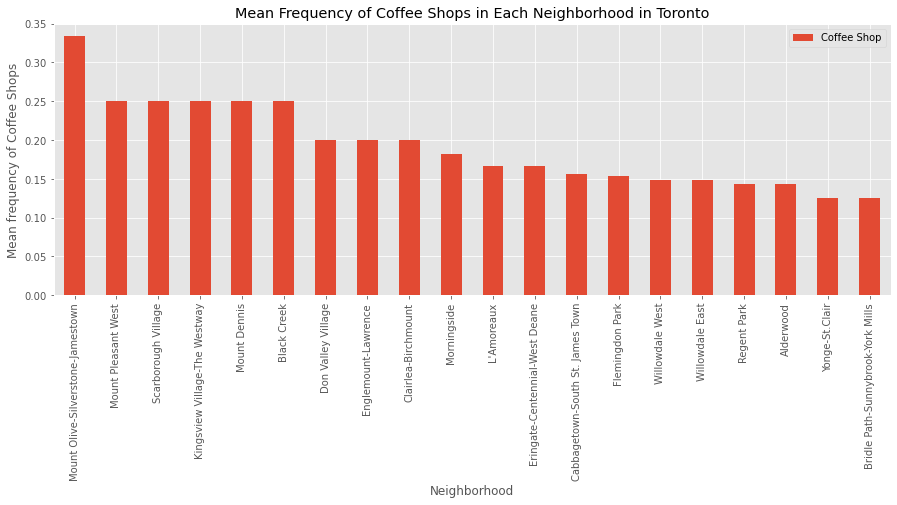

In [23]:
# sorting by descending order
df_coffee_grouped.sort_values(by='Coffee Shop', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
df_coffee_grouped[:20].plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Coffee Shops in Each Neighborhood in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('Mean frequency of Coffee Shops')

plt.show()

Mount Olive-Silverstone-Jamestown neighborhood is an unilikely choice to open a new Starbucks due to heavy competitors presence.

#### Plot a bar graph to illustrate the distribution of population in each neighborhood.

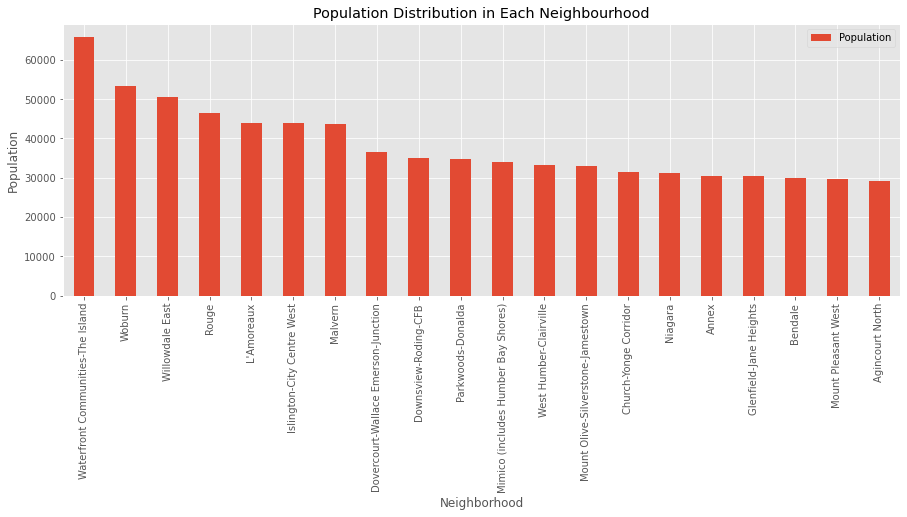

In [24]:
df_pop_plot = df_census.loc[:,['Neighborhood', 'Population']].set_index('Neighborhood')

# sort by descending order
df_pop_plot.sort_values(by='Population', ascending=False, inplace=True)

# plot bar graph
df_pop_plot[:20].plot(kind='bar', figsize=(15,5))
plt.title('Population Distribution in Each Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Population')

plt.show()

There are good neighborhood options that are densely populated to set up a new Starbucks. 

#### Plot a bar graph to illustrate the distribution of income in each neighborhood.

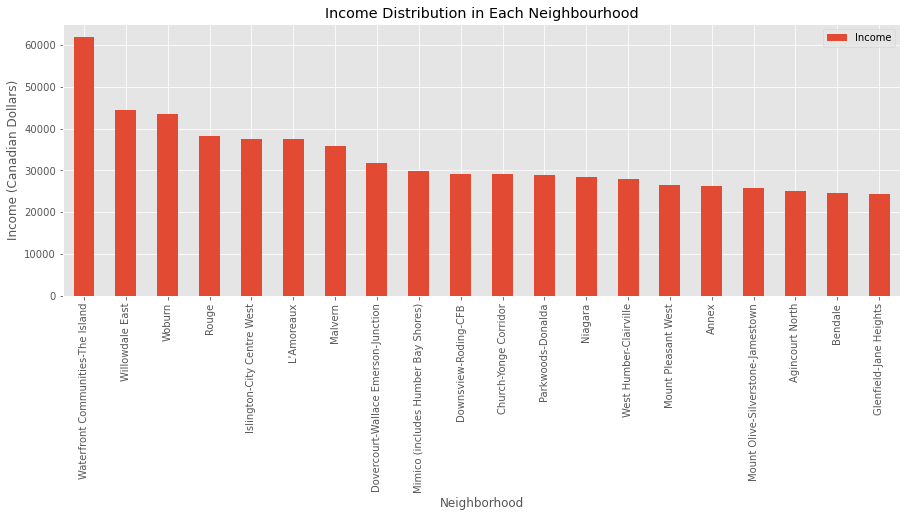

In [25]:
df_income_plot = df_census.loc[:,['Neighborhood', 'Income']].set_index('Neighborhood')

# sort by descending order
df_income_plot.sort_values(by='Income', ascending=False, inplace=True)

# plot bar graph
df_income_plot[:20].plot(kind='bar', figsize=(15,5))
plt.title('Income Distribution in Each Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Income (Canadian Dollars)')

plt.show()

### Clustering analysis

#### Create a target dataframe for clustering

In [27]:
# merge df_census with df_coffee_grouped
df_final = pd.merge(df_coffee_grouped, df_census, on='Neighborhood', how='right')
df_final.replace(np.nan, 0) #convert nan blanks to 0
df_final['Coffee Shop'] = df_final['Coffee Shop'].replace(np.nan, 0) #convert nan blanks to 0

# create the dataframe for clustering based on the location features
df_cluster = df_final.loc[:, 'Coffee Shop':'90 to 94 years']
print(df_cluster.shape)
df_cluster.head()


(139, 20)


,Coffee Shop,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years
0,0.035714,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0
1,0.000000,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0
2,0.142857,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0
3,0.051282,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0
4,0.000000,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0


We can see here that there is no target label/feature that act as an output and the learning algorithm is left on its own to find the structure in its input. This is Unsupervised Learning and to determine the internal grouping in a set of this unlabeled data, clustering analysis is done.

#### Normalize over the standard deviation

In [28]:
from sklearn.preprocessing import StandardScaler
X = df_cluster.values
Clus_dataset = StandardScaler().fit_transform(X)

df_loca_normalized = pd.DataFrame(Clus_dataset)
df_loca_normalized.columns = ['Coffee Shop', 'Population', 'Income', '0 to 14 years', '10 to 14 years','15 to 19 years', '20 to 24 years',
                              '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '50 to 54 years',
                              '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years',
                              '80 to 84 years', '85 to 89 years', '90 to 94 years']

print(df_loca_normalized.shape)
df_loca_normalized.head()

(139, 20)


,Coffee Shop,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years
0,-0.248829,0.953363,0.980551,0.640774,0.628792,1.097286,0.622901,0.213090,0.120640,0.067552,0.541056,1.424649,1.329024,1.687089,1.953022,1.796200,1.762612,1.734995,1.512535,1.358085
1,-0.750599,0.418191,0.453258,0.147566,0.052660,0.708071,0.509673,0.213090,0.026290,-0.077261,0.079014,0.719366,0.624808,0.767276,0.755495,0.592508,0.727842,0.648760,0.395413,0.155038
2,1.256480,-0.751174,-0.707932,-0.700237,-0.806816,-0.782542,-0.751273,-0.581513,-0.557959,-0.581210,-0.678432,-0.597642,-0.450047,-0.574900,-0.677442,-0.727202,-0.697088,-0.477706,-0.582069,-0.420333
3,-0.030109,1.094550,1.130715,-0.313407,-0.438469,-0.045517,1.379468,1.631807,1.223817,0.791616,0.669822,0.597021,0.661872,1.123938,1.584552,1.926721,1.643868,1.272339,1.540463,2.090375
4,-0.750599,0.811676,0.796572,0.489266,0.713795,0.542447,-0.035879,-0.164423,-0.009999,0.252912,0.730417,1.115188,0.891669,0.973765,1.471964,1.999232,2.339369,2.620075,3.690924,3.973406


In [39]:
# We will create a function diagnostic_plots() which plots the histogram, Q-Q plot, and box plot 
# for the specified variable of the given data frame.

# for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

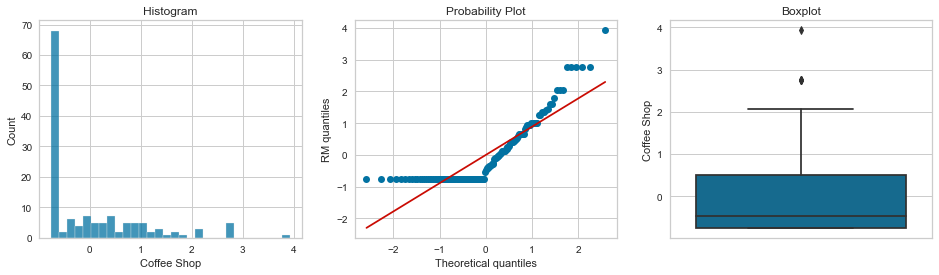

In [40]:
diagnostic_plots(df_loca_normalized, 'Coffee Shop')

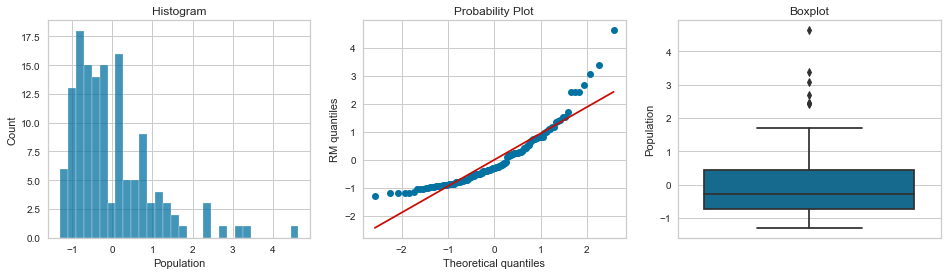

In [41]:
diagnostic_plots(df_loca_normalized, 'Population')

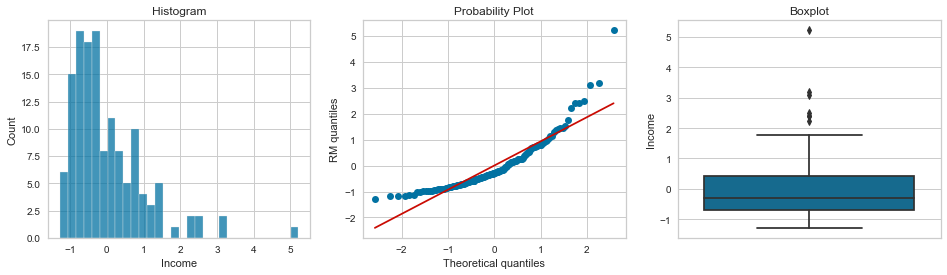

In [42]:
diagnostic_plots(df_loca_normalized, 'Income')

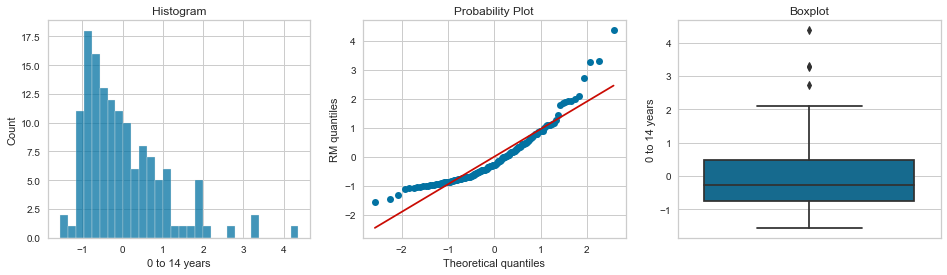

In [43]:
diagnostic_plots(df_loca_normalized, '0 to 14 years')

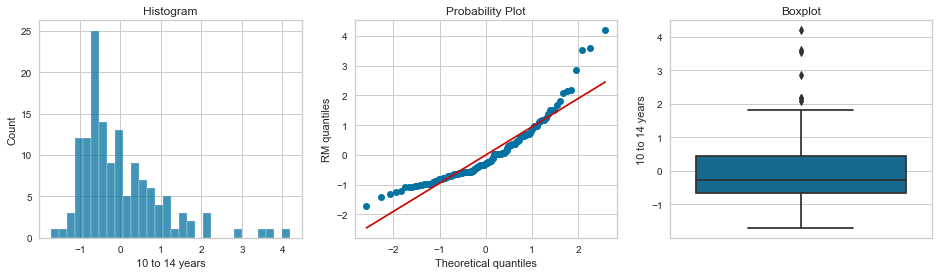

In [44]:
diagnostic_plots(df_loca_normalized, '10 to 14 years')

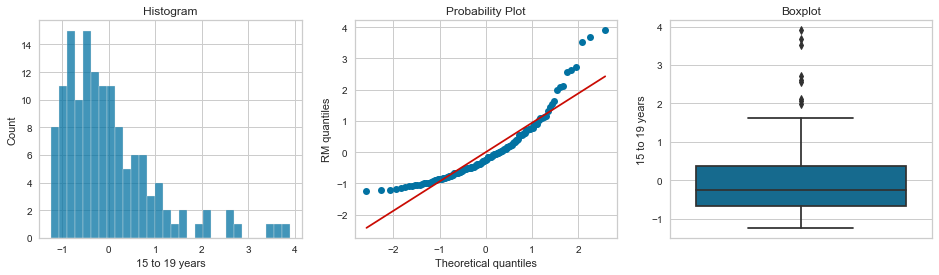

In [45]:
diagnostic_plots(df_loca_normalized, '15 to 19 years')

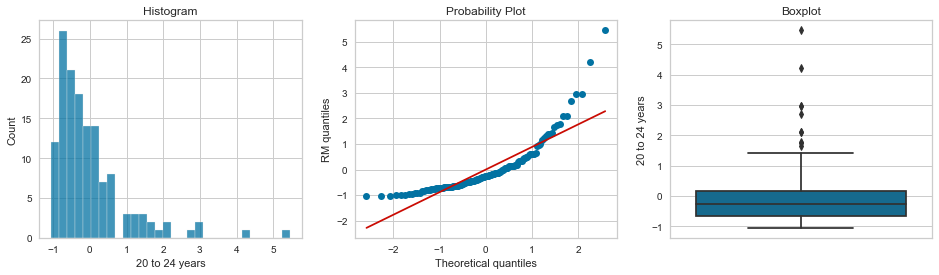

In [46]:
diagnostic_plots(df_loca_normalized, '20 to 24 years')

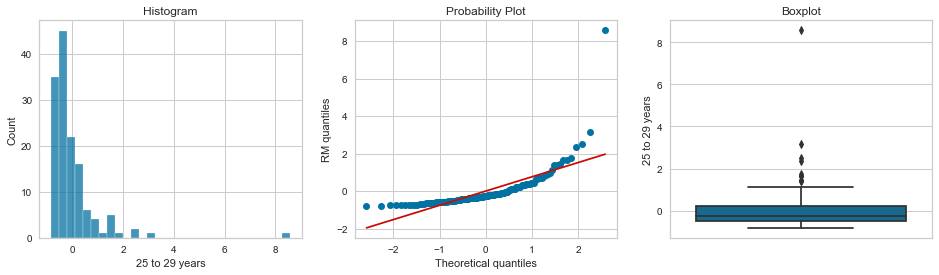

In [47]:
diagnostic_plots(df_loca_normalized, '25 to 29 years')

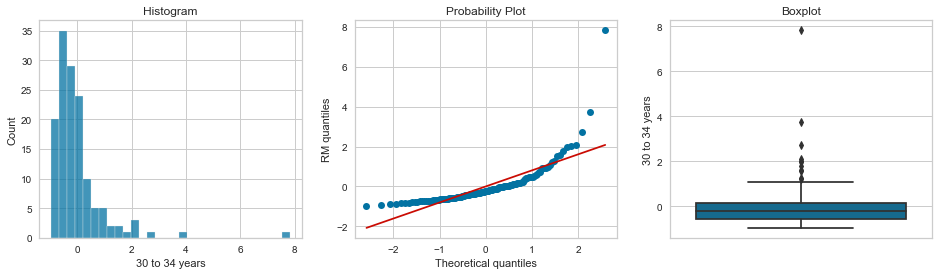

In [48]:
diagnostic_plots(df_loca_normalized, '30 to 34 years')

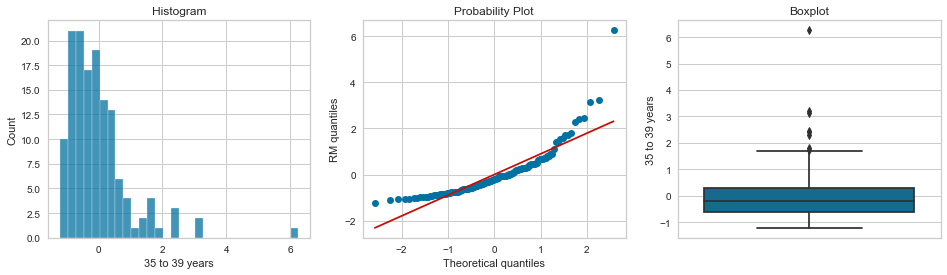

In [49]:
diagnostic_plots(df_loca_normalized, '35 to 39 years')

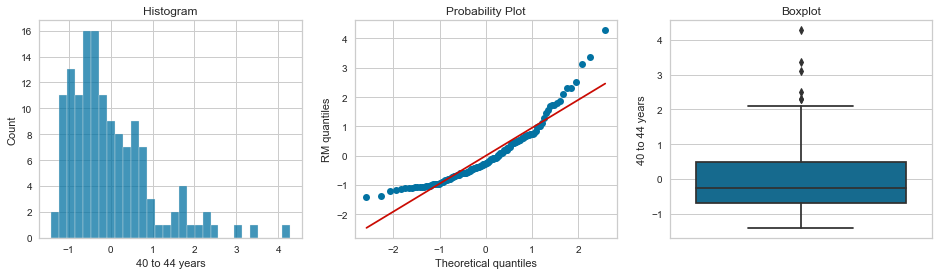

In [50]:
diagnostic_plots(df_loca_normalized, '40 to 44 years')

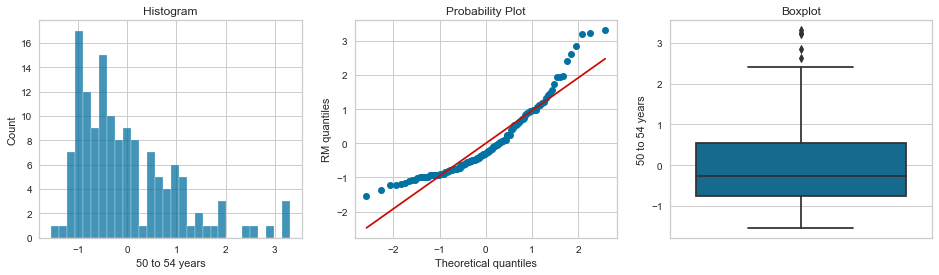

In [51]:
diagnostic_plots(df_loca_normalized, '50 to 54 years')

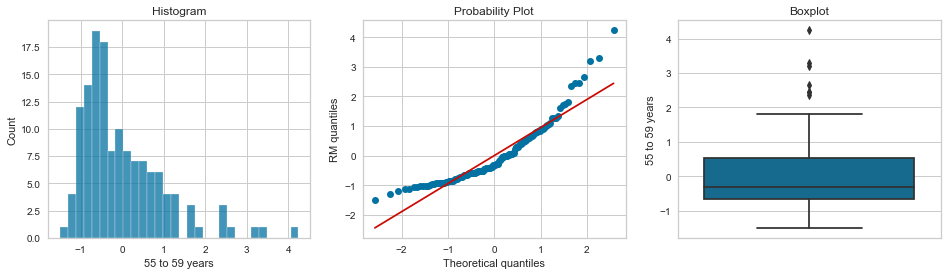

In [52]:
diagnostic_plots(df_loca_normalized, '55 to 59 years')

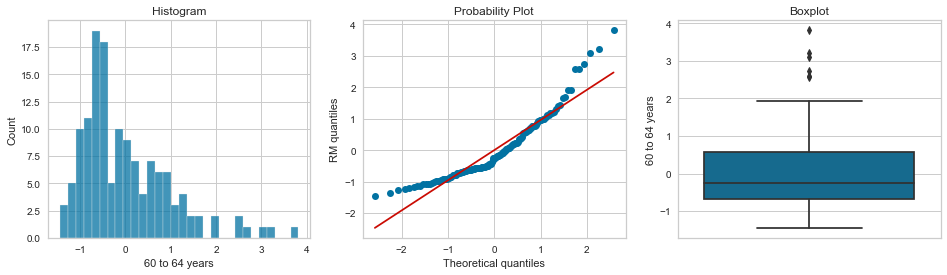

In [53]:
diagnostic_plots(df_loca_normalized, '60 to 64 years')

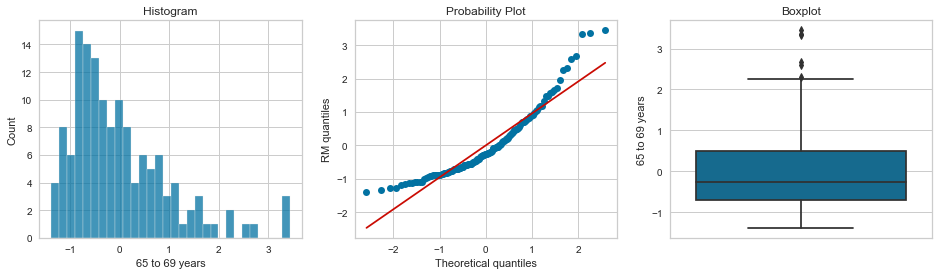

In [54]:
diagnostic_plots(df_loca_normalized, '65 to 69 years')

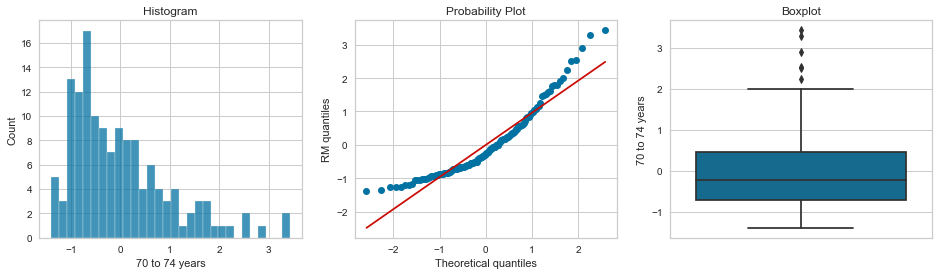

In [55]:
diagnostic_plots(df_loca_normalized, '70 to 74 years')

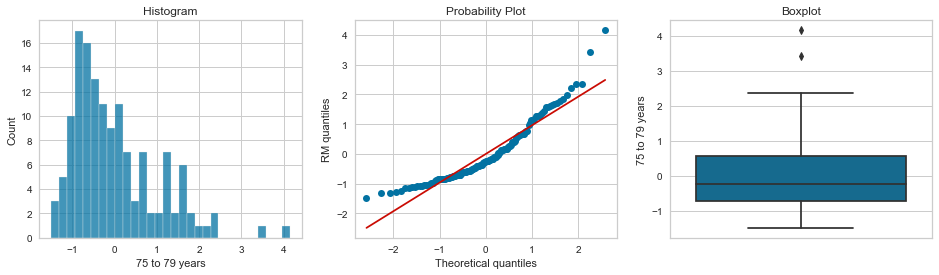

In [56]:
diagnostic_plots(df_loca_normalized, '75 to 79 years')

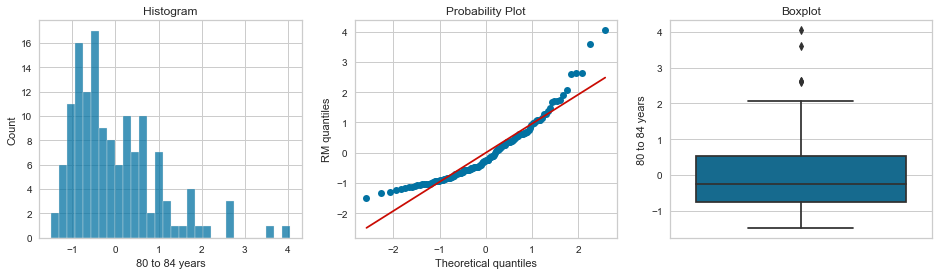

In [57]:
diagnostic_plots(df_loca_normalized, '80 to 84 years')

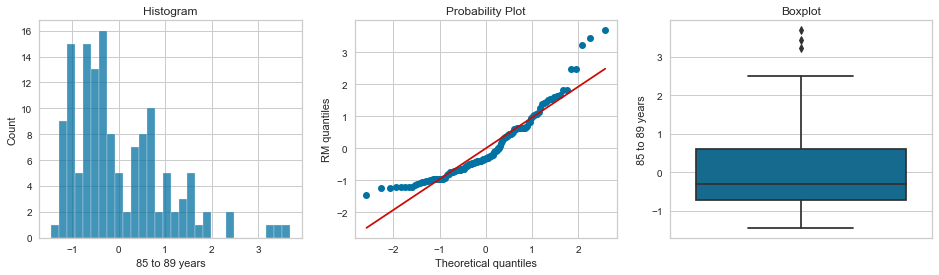

In [58]:
diagnostic_plots(df_loca_normalized, '85 to 89 years')

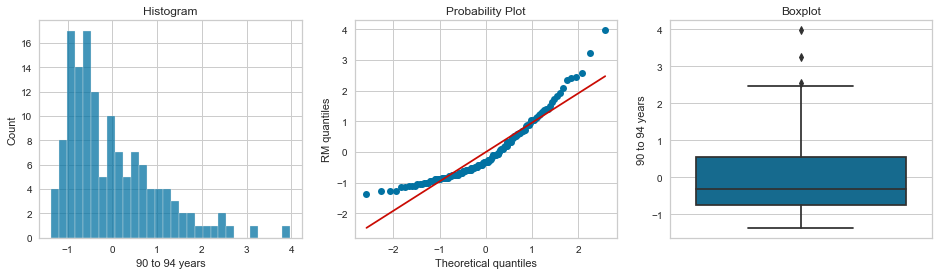

In [59]:
diagnostic_plots(df_loca_normalized, '90 to 94 years')

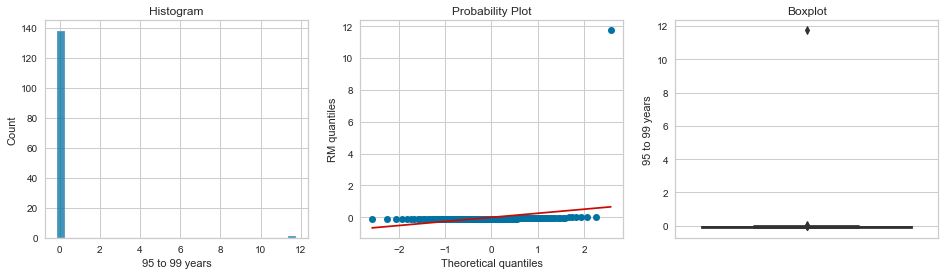

In [145]:
diagnostic_plots(df_loca_normalized, '95 to 99 years')

#### Find the optimal number of clusters, k

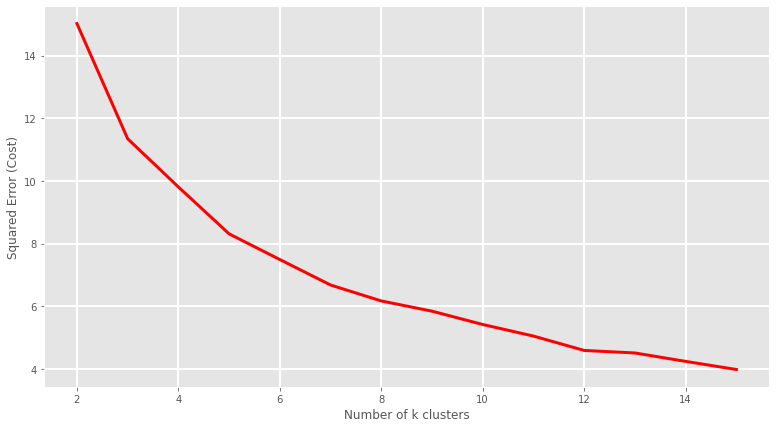

In [29]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(2, 16):
    KM = KMeans(n_clusters=i, max_iter=100)
    try:
        KM.fit(df_loca_normalized)

    except ValueError:
        print('Error on line', i)

    error_cost.append(KM.inertia_ / 100) # calculate squared error for the clustered points

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(2,16), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show() 

In [30]:
# Import ElbowVisualizer
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

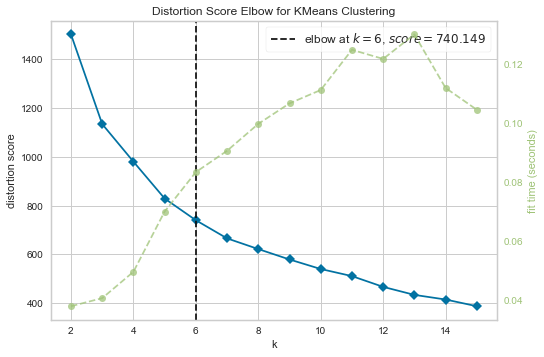

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,16), timings= True)
visualizer.fit(df_loca_normalized)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

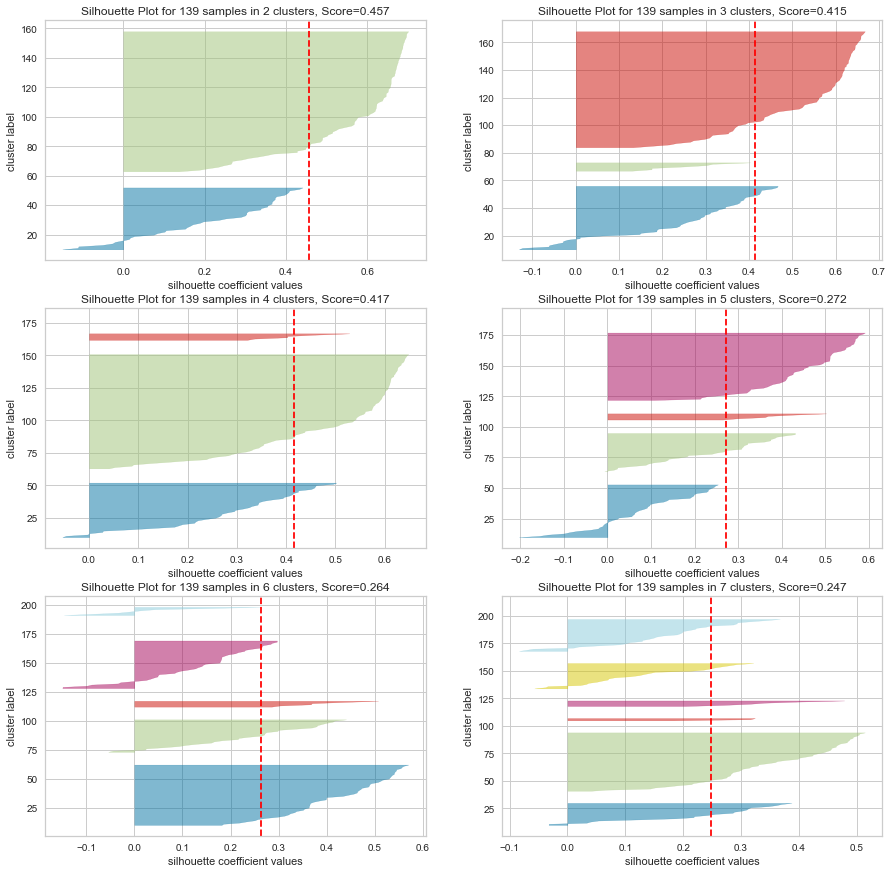

In [38]:
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes_flat = axes.flatten()                     # Flatted the axes to iterate
i=0
for k in range(2,8,1):
    model = KMeans(k)
    # Select the current axis
    ax=axes_flat[i]   
    # Creating SilhouetteVisualizer and assigning it to an axis
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes_flat[i])
    visualizer.fit(df_loca_normalized)
    # Setting subplot title via axis
    ax.set_title(f'Silhouette Plot for 139 samples in {k} clusters, Score={visualizer.silhouette_score_:.3f}')
    # Setting subplot x and y labels
    ax.set(xlabel='silhouette coefficient values', ylabel='cluster label')
    # Going to the next axis (subplot)
    i=i+1

plt.show()
